# Desafio DNC 4
## Contexto
Uma empresa está investindo mensalmente em plataformas de publicidade online,
como Youtube, Facebook e newspaper, para a prospecção de leads (pessoas
interessadas em seus produtos). A fim de acompanhar o desempenho desses
investimentos, a empresa registra todos os gastos com publicidade e todos os retornos
de vendas gerados a partir desses investimentos.
Para entender melhor a relação entre as variáveis presentes nesses registros e
identificar os fatores que mais impactam na geração de leads, a empresa solicitou a
análise de um especialista em dados. Além disso, a empresa busca criar um
modelo de predição de valores para estimar o retorno de vendas que pode ser gerado
a partir de um determinado investimento em publicidade.

## Sobre os dados
A tabela contém informações dos investimentos feitos pelo youtube, facebook,
newspaper e também a quantidade de cada.


| Coluna  | Descrição |
| ------------- | ------------- |
| youtube  |  Investimento no YouTube  |
| facebook | Investimento no Facebook  |
| newspaper |Investimento em Jornais  |
| sales | Valor das Vendas  |

## Importando e Vizualizando os Dados

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv("/content/MKT.csv")
df.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


## Análise Descritiva

In [32]:
print("Temos", df.shape[0], "linhas e", df.shape[1], "colunas.")

Temos 171 linhas e 4 colunas.


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


Vemos que possuimos 4 atributos com 171 instâncias cada.
Não temos nenhum valor nulo em nosso conjunto de dados e todos são do tipo float.

In [34]:
df.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


Nesta tabela podemos observar nossa média, desvio padrão, os quartis dos nossos dados, seus valores máximos e mínimos e sua contagem.


## Análise Exploratoria

<ipython-input-37-76069bb12b25>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




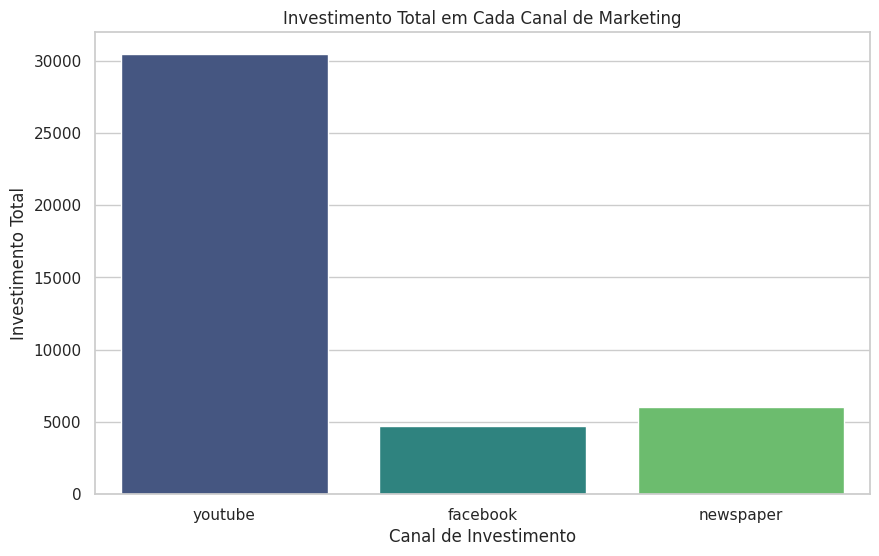

In [37]:
# Configurações estéticas do Seaborn
sns.set(style="whitegrid")

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=df.columns[:-1], y=df.iloc[:, :-1].sum(), palette="viridis")
plt.title('Investimento Total em Cada Canal de Marketing')
plt.xlabel('Canal de Investimento')
plt.ylabel('Investimento Total')
plt.show()





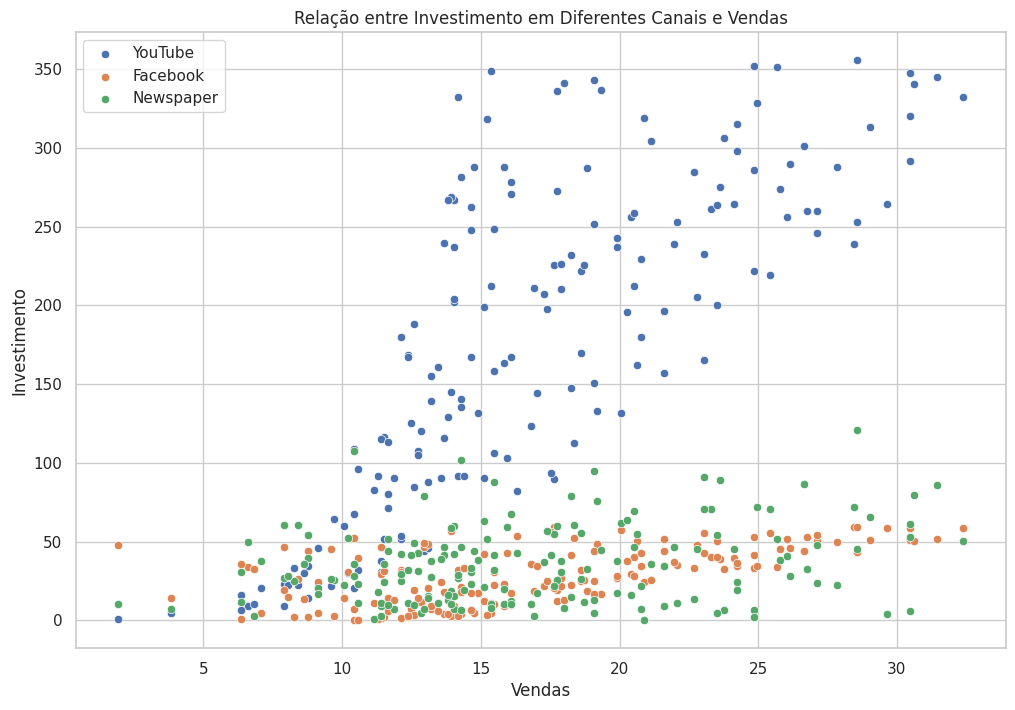

In [52]:
# Criando um scatter plot para a relação entre investimento e vendas com as variáveis 'facebook' e 'newspaper'
plt.figure(figsize=(12, 8))
sns.scatterplot(x='sales', y='youtube', data=df, label='YouTube')
sns.scatterplot(x='sales', y='facebook', data=df, label='Facebook')
sns.scatterplot(x='sales', y='newspaper', data=df, label='Newspaper')

plt.title('Relação entre Investimento em Diferentes Canais e Vendas')
plt.xlabel('Vendas')
plt.ylabel('Investimento')
plt.legend()
plt.show()



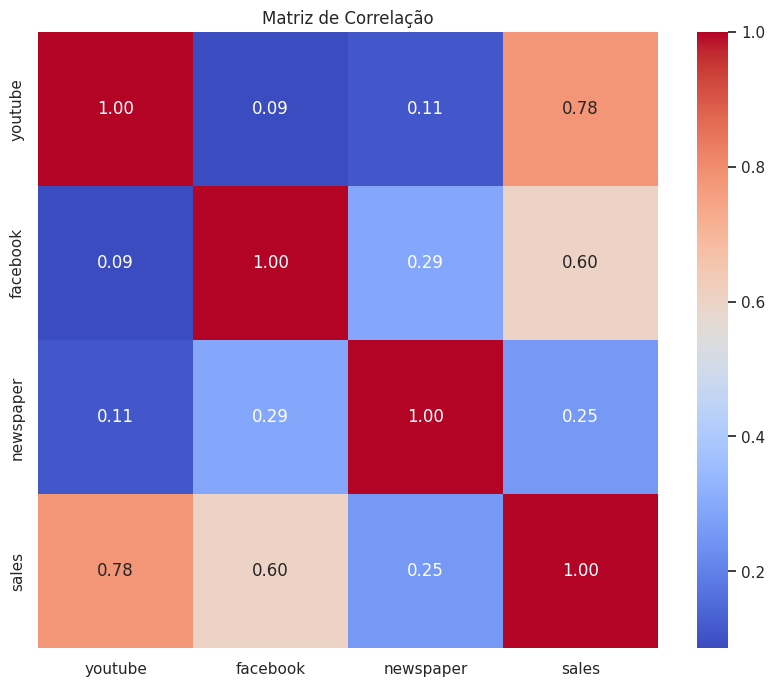

In [41]:
# Calculando a matriz de correlação
correlation_matrix = df.corr()

# Criando a matriz de correlação com heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

## Modelagem


- Importação das Bibliotecas

In [53]:
# Importando as bibliotecas necessárias
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


- Preparação dos Dados

In [54]:
# Separando as variáveis independentes (X) e a variável dependente (y)
X = df[['youtube', 'facebook', 'newspaper']]
y = df['sales']

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


- Treinamento do Modelo

In [55]:
# Criando uma instância do modelo de regressão linear
model = LinearRegression()

# Treinando o modelo com os dados de treino
model.fit(X_train, y_train)


LinearRegression()

- Predição e Cálculo do R²


In [56]:
# Realizando predições com os dados de teste
y_pred = model.predict(X_test)

# Calculando o coeficiente de determinação (R²)
r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de Determinação (R²): {r2}")


Coeficiente de Determinação (R²): 0.872863085701216


- Vizualização dos Resultados


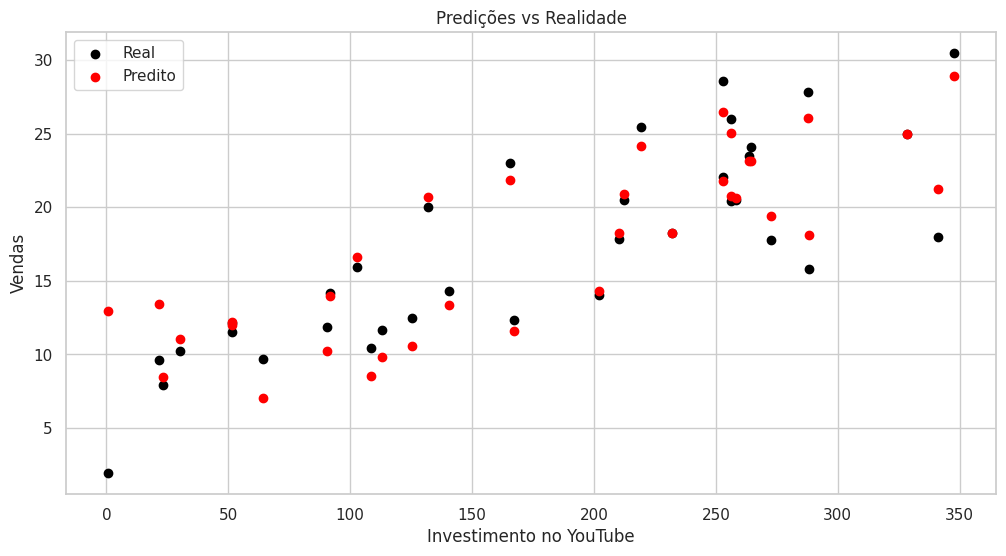

In [58]:
# Visualizando as predições em comparação com os dados reais
plt.figure(figsize=(12, 6))
plt.scatter(X_test['youtube'], y_test, color='black', label='Real')
plt.scatter(X_test['youtube'], y_pred, color='red', label='Predito')
plt.title('Predições vs Realidade')
plt.xlabel('Investimento no YouTube')
plt.ylabel('Vendas')
plt.legend()
plt.show()


### Conclusão da Análise do Coeficiente de Determinação (R²)

O modelo de regressão linear aplicado aos dados de investimento em publicidade nos canais de YouTube, Facebook e jornais (newspaper) apresentou um coeficiente de determinação (R²) de aproximadamente 0.87. Esse valor sugere que o modelo é capaz de explicar cerca de 87% da variabilidade das vendas com base nos investimentos realizados nos canais mencionados.

**Interpretação do R²:**
- O R² varia de 0 a 1, representando a porcentagem da variabilidade na variável dependente que é explicada pelo modelo.
- Neste caso, um R² de 0.87 indica uma boa capacidade do modelo em capturar os padrões existentes nos dados de investimento e vendas.

**Implicações e Recomendações:**
- A alta porcentagem de variabilidade explicada sugere que os investimentos nos canais analisados têm uma forte correlação com as vendas.
- A empresa pode utilizar esse modelo para prever as vendas com base nos futuros investimentos em publicidade, permitindo uma alocação mais eficiente de recursos.
- Recomenda-se, no entanto, uma avaliação contínua do modelo à medida que novos dados são coletados, garantindo sua relevância ao longo do tempo.

**Considerações Finais:**


Em resumo, o modelo demonstrou ser uma ferramenta valiosa para prever as vendas com base nos investimentos em publicidade, proporcionando insights significativos para a tomada de decisões estratégicas da empresa.